<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
# A:

import pandas as pd

df = pd.read_csv(sac_csv)

df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [3]:
# A:
# Check the dtypes.
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [4]:
df.info

<bound method DataFrame.info of                               street             city    zip state  beds  \
0                       3526 HIGH ST       SACRAMENTO  95838    CA     2   
1                        51 OMAHA CT       SACRAMENTO  95823    CA     3   
2                     2796 BRANCH ST       SACRAMENTO  95815    CA     2   
3                   2805 JANETTE WAY       SACRAMENTO  95815    CA     2   
4                    6001 MCMAHON DR       SACRAMENTO  95824    CA     2   
5                 5828 PEPPERMILL CT       SACRAMENTO  95841    CA     3   
6                6048 OGDEN NASH WAY       SACRAMENTO  95842    CA     3   
7                      2561 19TH AVE       SACRAMENTO  95820    CA     3   
8    11150 TRINITY RIVER DR Unit 114   RANCHO CORDOVA  95670    CA     2   
9                       7325 10TH ST        RIO LINDA  95673    CA     3   
10                  645 MORRISON AVE       SACRAMENTO  95838    CA     3   
11                     4085 FAWN CIR       SACRAMENTO  9

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [5]:
# Zip code works better as a string object (categorical) so we will have to convert it.
df['zip'] = df['zip'].astype(str)

In [6]:
df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [7]:
# A:# It appears that we have some values that are out of place, as there are
# houses with 0 bedrooms, 0 baths, negative square footage, and negative prices.  
# There are also some bizarre longitudes/latitudes in our data set. A house in Antarctica perhaps?

In [8]:
# Check out the cities. Most cities have very few observations.# Check 
df.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
LOOMIS               2
EL DORADO            2
FORESTHILL           1
SHINGLE SPRINGS      1
SLOUGHHOUSE          1
GARDEN VALLEY        1
PENRYN               1
GREENWOOD            1
MATHER               1
WALNUT GROVE         1
DIAMOND SPRINGS      1
COOL                 1
MEADOW VISTA         1
Name: city, dtype: int64

In [9]:
pd.options.display.max_rows = 999

In [10]:
# What could explain the houses with 0 bedrooms?
df[df['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


In [11]:
print(df[df['beds'] == 0].shape)

(108, 12)


In [12]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [13]:
# Given the large number of houses that have 0 beds, 0 baths and 0 square feet, 
# we can make an assumption that these are plots of land that haven't had anything built on them yet.
# As a result we will *not* be dropping them.

In [14]:
# What about the houses that are less than 0 dollars?
df[df['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [15]:
# And the houses with negative square footage?
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [16]:
# It looks like the house with a negative price is also the one with negative square footage.
# It is time to make a choice: Either assume that the data were entered improperly and are meant 
# to be positive, or drop the data altogether.

# Side note: Notice the state is actually labeled incorrectly as well.(AC)

In [17]:
# Let's check if any other values are labeled incorrectly.
df[df['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [18]:
# It looks like only one row is mislabeled, so we'll just drop that row.

df.drop(703, inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
heat = df.corr()

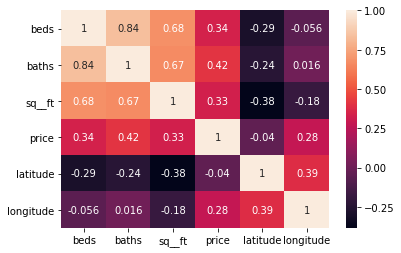

In [21]:
sns.heatmap(heat, annot = True)

In [23]:
#so it looks like beds, baths and square feet are reasonable predictors of housing price, however, 
#square feet might be too highly correlated with beds an dbaths


In [22]:
# df['baths'] = df['baths'].replace(0,1)

In [23]:
df['baths'].value_counts()

2    544
1    179
3    132
0    108
4     19
5      2
Name: baths, dtype: int64

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [24]:
df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [25]:
# A:# It looks like square footage is a better predictor of price than number of beds or baths.
# Beds and baths are discrete measures as opposed to square footage, which is a continuous measure.  
# Additionally, there are likely strong correlations between the square footage and numbers of bedrooms and bathrooms, in that houses 
# with greater square footage will likely have more bedrooms and bathrooms.

# If we dropped all of the plots of land that are in the data set (those with 0 sq ft, 
# beds, and baths), we would see a much stronger trend line in our lm plot.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [26]:
# A:
import numpy as np
import scipy.stats

# Get the optimal slope and y intercept.

def lin_reg(k, h):
    # Using other libraries for standard deviation and the Pearson correlation coefficient.
    # Note that in SLR, the correlation coefficient multiplied by the standard deviation of y 
    #divided by standard deviation of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(k,h)[0])*(np.std(h)/np.std(k))
    
    # The Pearson correlation coefficient returns a tuple, so it needs to be sliced/indexed.
    # The optimal beta is found by: mean(y) - b1 * mean(x).
    beta_0 = np.mean(h)-(beta_1*np.mean(k)) 
    
    return beta_0, beta_1

In [27]:
#optimal slope (beta1): the correlation coefficient (r) *(standard deviation of y/standard deviation of x)  

In [28]:
x = df['sq__ft'].values
y = df['price'].values
beta0, beta1 = lin_reg(x,y)

#Print the optimal values.
print('The Optimal Y Intercept is ', beta0)
print('The Optimal slope is ', beta1)

The Optimal Y Intercept is  162938.737561
The Optimal slope is  54.156197523


### 6. Interpret the intercept. Interpret the slope.

In [29]:
# A:
# The intercept should be the relative y value around which our data begin 
# in that from this point out, as the x values increase, so should the y value from this point.

# The intercept is an "offset." Without the intercept, our regression line would
# be forced to pass through the origin.

# The slope is the increase in our target variable (price) for every 1-unit increase
# in our predictor variable (sq__ft). So in our example, for every sq__ft increase there is
# an associated increase of ~54 dollars in price.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [30]:
# A:
# Prediction:
# You are a real estate agent with a separate database on house characteristics and locations.
# You want to estimate what price one of these houses will most likely sell for based
# on the model that we built using this data.

# Inference:
# You work for an architecture company that wants to understand what specific locations and housing characteristics 
# are associated with perceived value. You have some hypotheses about what
# makes a house valuable but you would like to test these hypotheses.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [31]:
# A:

# Predictor: y = 162938.74 + 54.16x
# Creating a list of predicted values:

y_pred = beta0 + beta1*x

In [32]:
# Appending the predicted values to the Sacramento housing DataFrame to do DF calcs:
df['Pred'] = y_pred

In [33]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Pred
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,208213.318690
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,226139.020070
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,206047.070789
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,209079.817851
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,206101.226987


In [34]:
# Appending the predicted values to the Sacramento housing DataFrame to do DF calcs:
df['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred:
df['Residuals'] = abs(df['price']-df['Pred'])

In [35]:
df['Residuals'].mean()
# The mean of our residuals is approximately $96,000, which means that 
# on average our prediction is off by this amount.

95953.505445110335

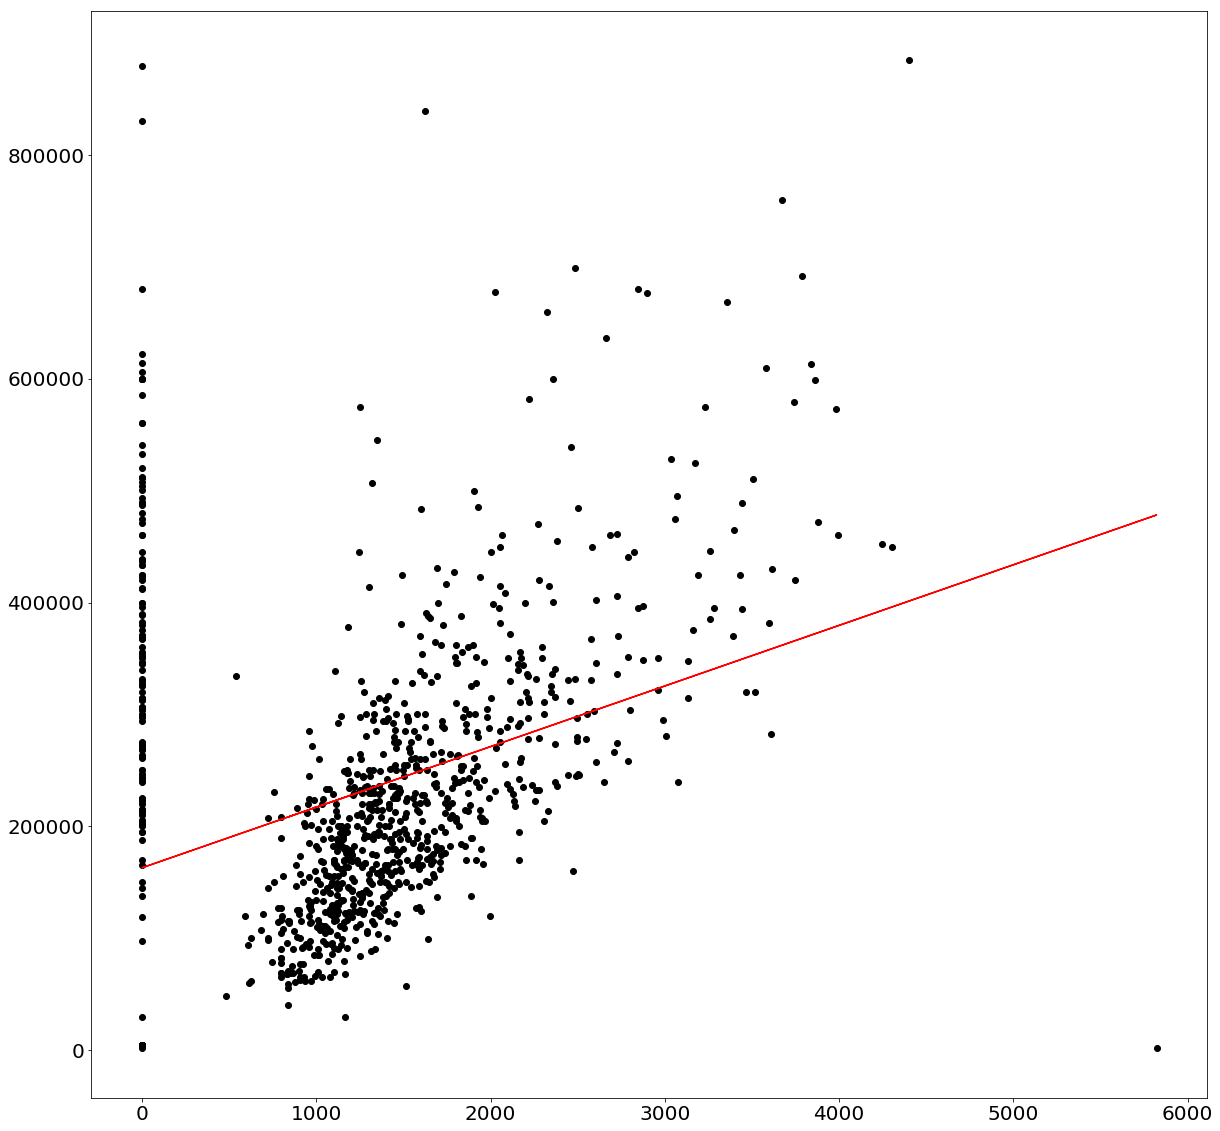

In [36]:
# Plot showing our linear forecast.
fig = plt.figure(figsize=(20,20))

# Change the font size of minor ticks label.
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# Get the axis of that figure.
ax = plt.gca()

# Plot a scatterplot on the axis using our data.
ax.scatter(x= df['sq__ft'], y=df['price'], c='k')
ax.plot(df['sq__ft'], df['Pred'], color='r');

Bonus: It looks like all of those "zero-price" entries are skewing our predictions. We could correct for that! How

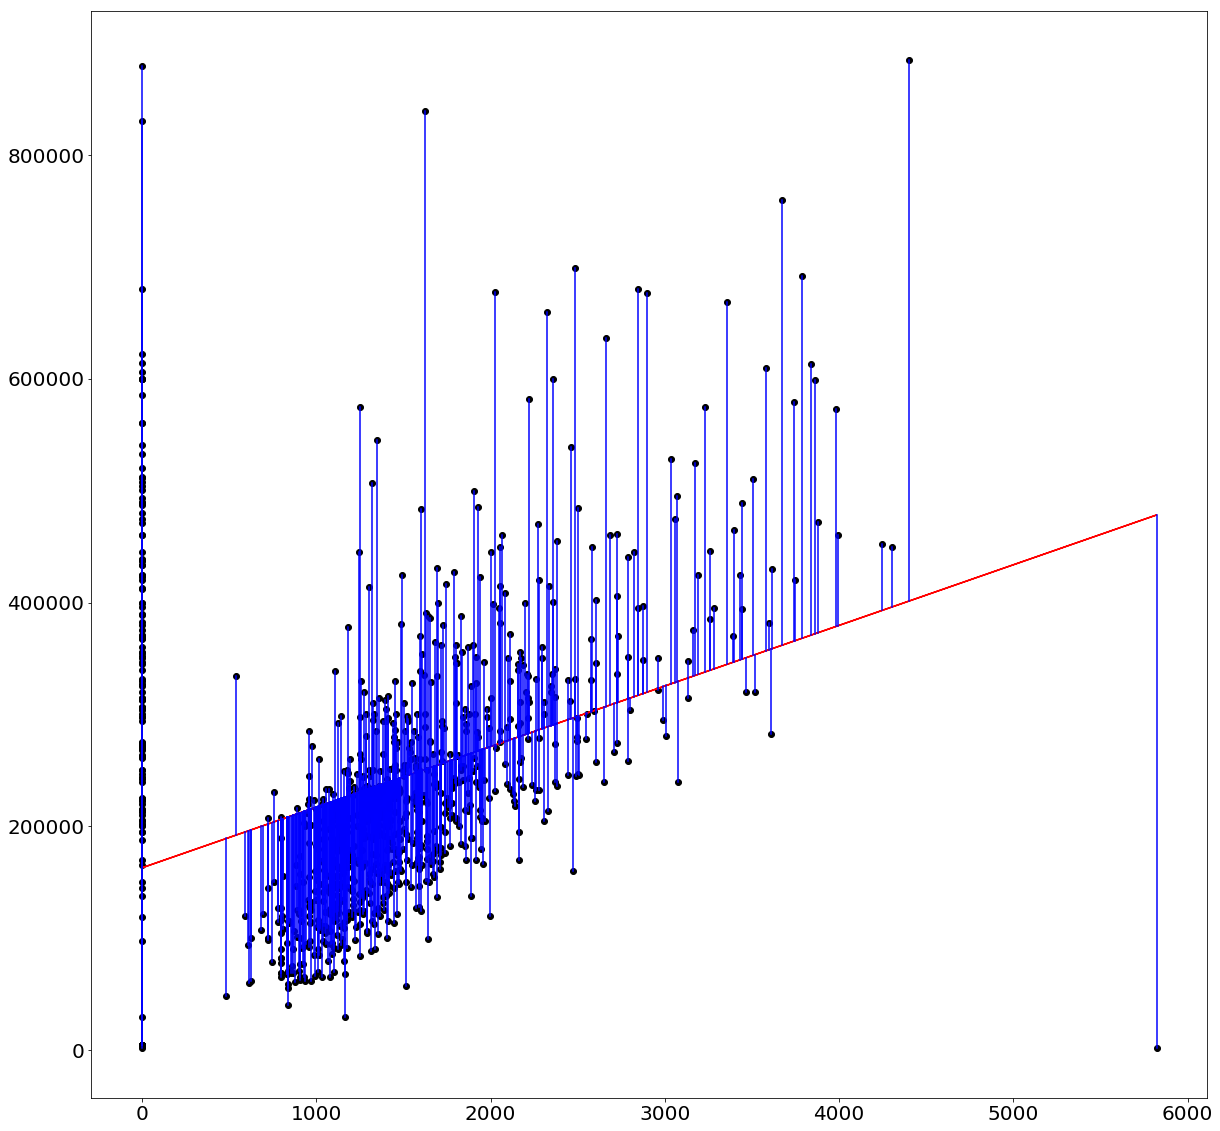

In [37]:
# Plot with residuals.
fig = plt.figure(figsize=(20,20))

# Change the font size of minor ticks label.
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# Get the axis of that figure.
ax = plt.gca()

# Plot a scatterplot on the axis using our data.
ax.scatter(x= df['sq__ft'], y=df['price'], c='k')
ax.plot(df['sq__ft'], df['Pred'], color='r');

# Iterate over predictions.
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Pred']), 'b-')

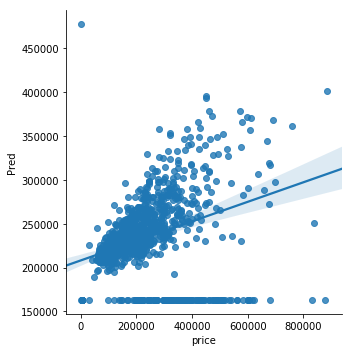

In [38]:
# One more plot; let's look at how our predictions compare to the true values.
sns.lmplot(x='price', y='Pred', data=df)

In [39]:

# Given our last visual, we can see that a lot of points were plotted along the # Given  
# y intercept (y= 162938.74). These were all the houses reported to have a
# square footage of 0. We could probably create a more insightful
# model if we removed those observations from our data.

In [67]:
lr.predict(X)

array([ 184632.6621319 ,  183713.67541078,  184256.31418194,
        184783.20131188,  184265.72288069,  183290.28396708,
        245082.02517285,  183807.76239827,  247581.67328378,
        245477.19052031,  243247.32891683,  246822.63444139,
        188995.23259509,  182330.5966947 ,  248343.77788243,
        249397.55214231,  184707.93172189,  184246.9054832 ,
        182299.30484218,  247453.01725757,  245213.74695534,
        243165.71638436,  242328.34219571,  249758.14845103,
        243172.05932684,  244931.48599287,  181794.30086602,
        245223.15565409,  243645.56002055,  246436.87779269,
        248503.72576116,  245533.6427128 ,  247678.82602754,
        245194.92955784,  248503.72576116,  248036.35657999,
        244875.03380038,  244511.16030545,  241443.92451332,
        187950.86703397,  250997.03092961,  246051.12114399,
        244630.40763291,  248541.36055616,  245593.16066156,
        179238.2005626 ,  245527.29977032,  187094.46401789,
        246242.36087524,

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [40]:
# A:   
df['type'].nunique()

4

In [41]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [42]:
df['type'].value_counts()

Residential     917
Condo            53
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [43]:
type_dummy = pd.get_dummies(df['type'])
type_dummy.head(10)

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,1,0


In [45]:
type_dummy.dtypes

Condo           uint8
Multi-Family    uint8
Residential     uint8
Unkown          uint8
dtype: object

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [46]:
# A:


type_dummy.drop('Unkown', axis=1, inplace=True)
df = pd.concat([df, type_dummy], axis=1)
df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Pred,Residuals,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,208213.31869,148991.31869,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,226139.02007,157927.02007,0,0,1


In [48]:
X = df[['beds', 'baths', 'sq__ft', 'Residential']]



,beds,baths,sq__ft,Residential
0,2,1,836,1
1,3,1,1167,1
2,2,1,796,1
3,2,1,852,1
4,2,1,797,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [50]:
# A:

df['Huge_homes'] = (df['sq__ft'] > 3775).astype(int)

In [51]:
df['Huge_homes'].value_counts()

0    974
1     10
Name: Huge_homes, dtype: int64

In [58]:

from  sklearn.linear_model import LinearRegression

X = df[['sq__ft','beds','baths', 'Huge_homes','Multi-Family']].values
y = df['price'].values

lr = LinearRegression()   #instantiate model
lr.fit(X, y)  #fit the model

y_pred = lr.predict(X)    #get your y-predictions

In [59]:
lr.score(X, y)   #coefficient of determination R^2 of the prediction.  0.236... not awesome. 

0.1995935668956218

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

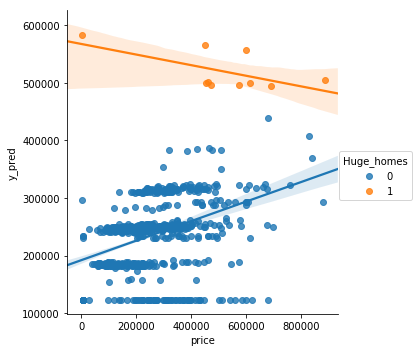

In [66]:
# A:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df['y_pred'] = y_pred
sns.lmplot(x='price', y='y_pred', data=df, hue='Huge_homes',)

In [62]:
df['y_pred'].head()

0    184632.662132
1    183713.675411
2    184256.314182
3    184783.201312
4    184265.722881
Name: y_pred, dtype: float64

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

SLR AND MLR:

Linearity: Y must have an approximately linear relationship with each independent X_i.

Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.

Normality: The errors (residuals) follow a Normal distribution.

Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)

MLR ONLY:

Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

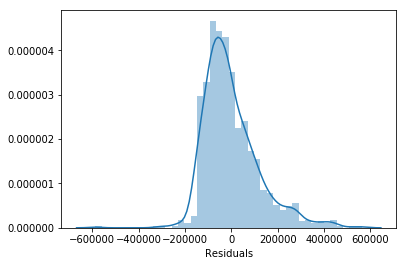

In [71]:
# A:
# Normality:  Do the Residual Errors follow a normal distribution?

# I believe all those properties with 0 values are causing the Y intercept to be higher up
# resulting in a less steep slope, thus creating areas where residual error is higher.

df['Residuals'] = df['price'] - df['y_pred']
sns.distplot(df['Residuals'])

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [ ]:
# A:

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [ ]:
# A:

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [ ]:
# A:

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A: